In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from felpy.model.beamlines.exfel_spb.methods import get_beamline_object
from felpy.model.src.coherent import construct_SA1_wavefront, construct_SA1_pulse
from felpy.model.tools import propagation_parameters
from wpg.wpg_uti_wf import plot_intensity_map
from felpy.utils.vis_utils import Grids

Initialising Single Particle Beamline
Attention!!! The "total" polarization behavior sometimes strange. Use "horizontal" or "vertical".


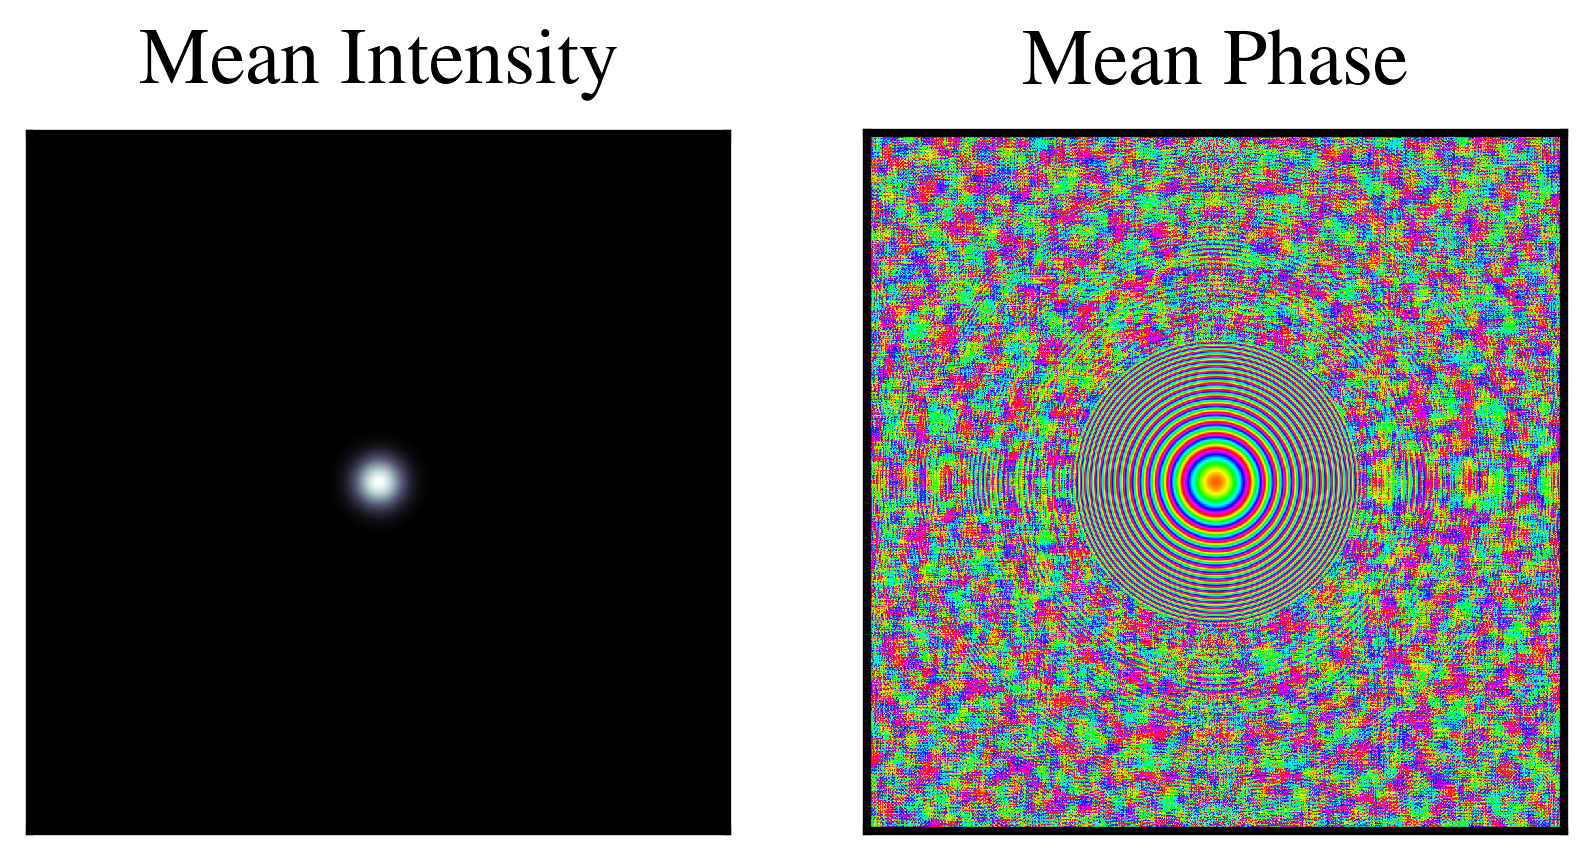

None
d1
HOM1
d2
HOM2
d3
NKB-Pslit
d4
NHE_error
NHE
d5
NVE_error
NVE
df


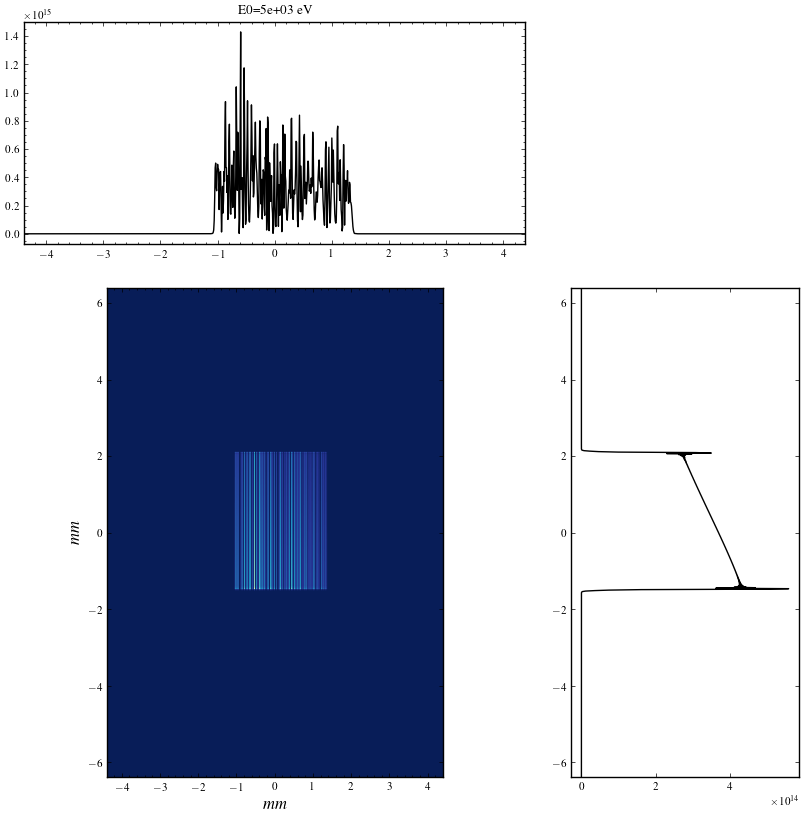

In [2]:
wfr = construct_SA1_wavefront(1024, 1024, 5.0, 0.25)

spb = get_beamline_object(apertures = True, surface = True, crop = ["d1","NVE"])
spb.propagation_options[0]['optical_elements'][-1].L    += 2.2
spb.propagation_options[0]['propagation_parameters'][-1] = propagation_parameters(1,1,1,1,mode = 'quadratic')
sequential_intensity, sequential_mesh = spb.propagate_sequential(wfr, return_intensity = True, return_mesh = True)

plot_intensity_map(wfr)
    

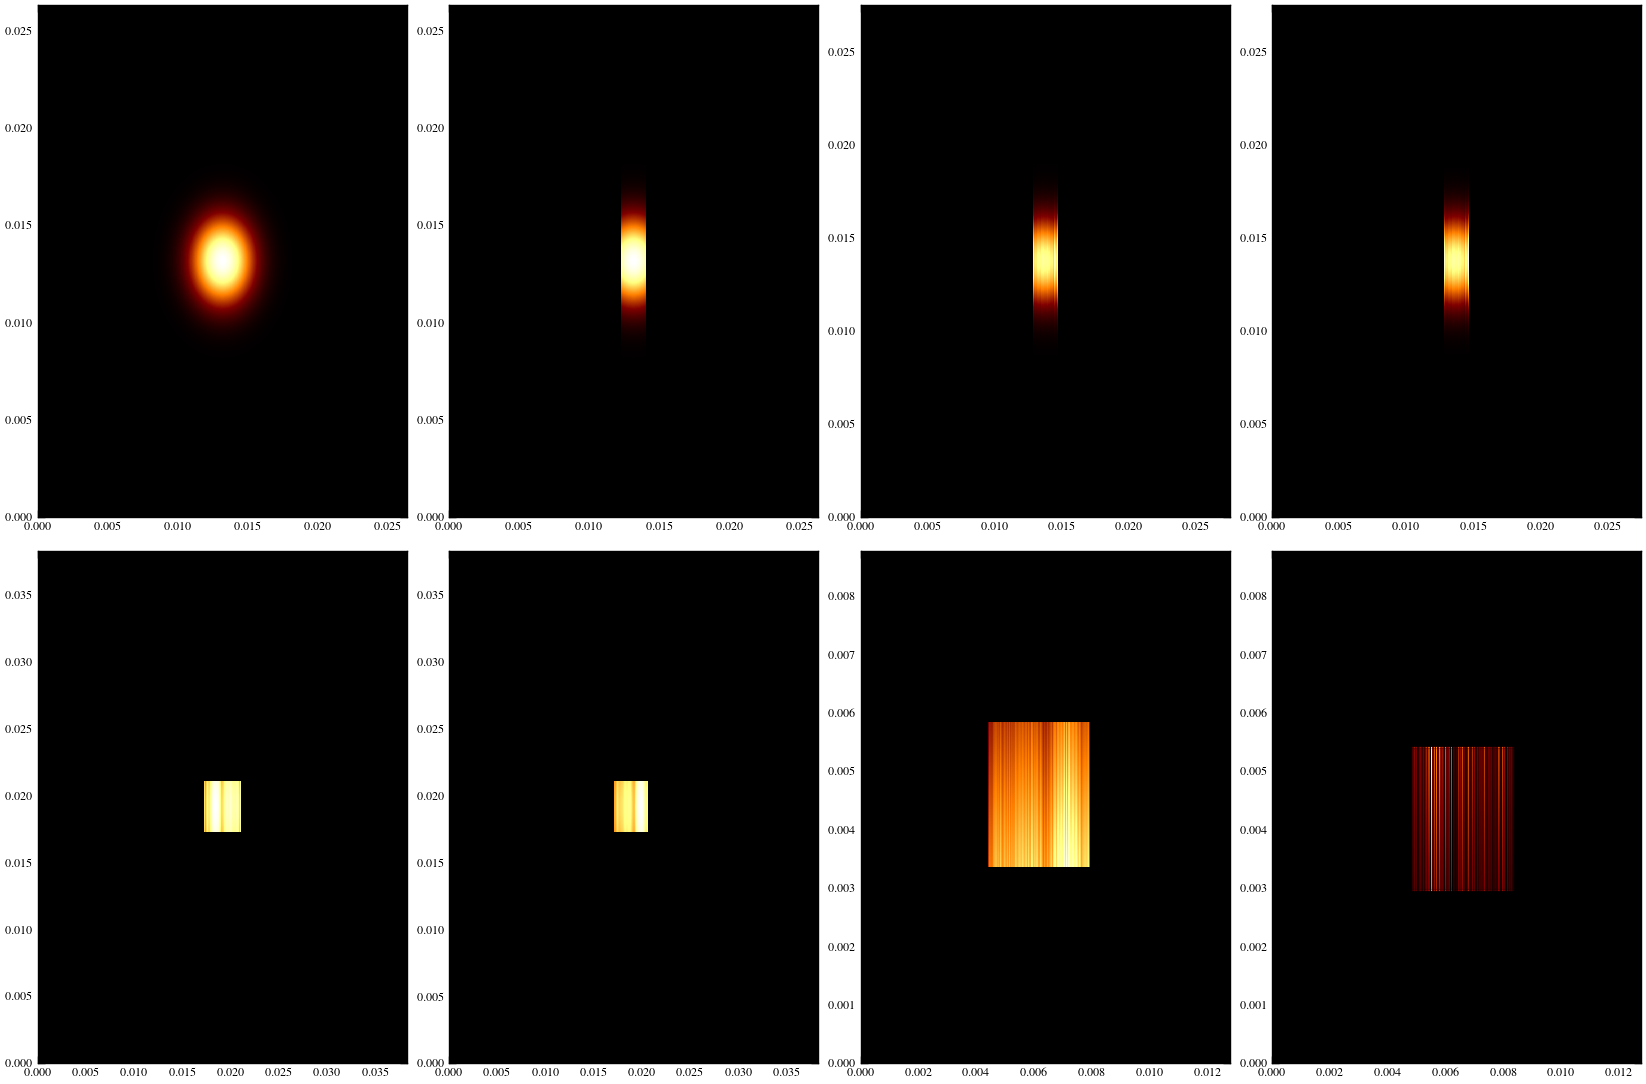

In [11]:
plot = Grids(scale = 3, global_aspect = 1.5)
plot.create_grid(n = 2, m = 4, sharex = False, sharey = False)
axes = plot.axes.flatten()

cmap = 'afmhot'
chosen = [0,1,2,3,5,8,11,12]
labels = []
for i,j in enumerate(chosen):
    
    axes[i].imshow(sequential_intensity[j], cmap = cmap, extent = [np.min(sequential_mesh[j][1]), np.max(sequential_mesh[j][1]),
                      np.min(sequential_mesh[j][0]), np.max(sequential_mesh[j][0])])
    axes[i].set_aspect('auto')